# Logistic Regression
***
## Definition
Logistic Regression is a statistical method for binary classification that predicts the probability of a binary outcome based on one or more predictor variables. It is widely used in machine learning and statistics to model the relationship between a dependent binary variable and one or more independent variables.

Logistic Regression is a type of regression analysis used when the dependent variable is categorical, specifically binary. It estimates the probability that a given input point belongs to a particular category. It is a fundamental technique in machine learning due to its simplicity and interpretability.

### History
- Developed in the 19th century by Pierre François Verhulst and later popularized in the 20th century.
- Applied in various fields such as medicine, social sciences, and economics to model categorical outcomes.

## Sigmoid Function
The core component of Logistic Regression is the Sigmoid function (Logistic or Squashing function), which maps any real-valued number into a value between 0 and 1. This function is essential for predicting probabilities.

### Sigmoid Function Formula
The Sigmoid function $ \sigma(z) $ is defined as:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

Where:
- $ z $ is the input to the function, which is a linear combination of the features.
- $ e $ is the base of the natural logarithm.

### Properties
- The Sigmoid function outputs values in the range (0, 1), making it suitable for probability estimation.
- It has an S-shaped curve, where values close to 0 are mapped to values close to 0 and values close to 1 are mapped to values close to 1.

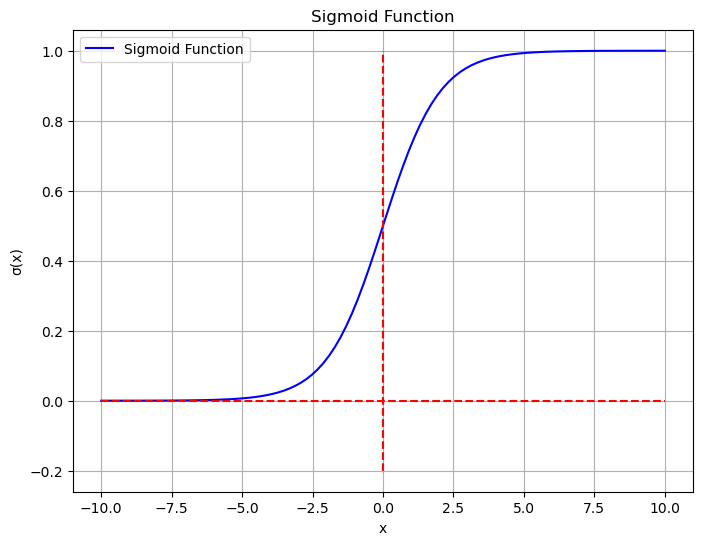

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Data for plotting
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Ploting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.hlines(0,-10,10,color='r',linestyles='dashed')
plt.vlines(0,-0.2,1,color='r',linestyles='dashed')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()


### Model Representation

In logistic regression, the probability of the binary outcome $ Y = 1 $ given the input features $ X $ is modeled as:

$ P(Y = 1 | X) = \sigma(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n) $

Where:
- $ \beta_0 $ is the intercept (bias term).
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients of the features $ X_1, X_2, \ldots, X_n $.
- $ \sigma $ denotes the sigmoid function.

The logistic regression model estimates the coefficients $ \beta $ by fitting the model to the data using optimization techniques.

### Cost Function

The cost function used in logistic regression is the **log-loss** function (also known as cross-entropy loss). It measures the performance of the classification model by penalizing incorrect predictions:

$ J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h(x_i)) + (1 - y_i) \log(1 - h(x_i)) \right] $

Where:
- $ m $ is the number of training examples.
- $ y_i $ is the true label of the $ i $-th example.
- $ h(x_i) = \sigma(\beta^T x_i) $ is the predicted probability of the positive class.

The goal is to minimize this cost function to find the best-fitting model parameters $ \beta $.

### Optimization

To find the optimal parameters, logistic regression uses optimization techniques such as **Gradient Descent** or **Newton's Method**. Gradient Descent iteratively adjusts the parameters to minimize the cost function:

$ \beta := \beta - \alpha \frac{\partial J(\beta)}{\partial \beta} $

Where:
- $ \alpha $ is the learning rate.
- $ \frac{\partial J(\beta)}{\partial \beta} $ is the gradient of the cost function with respect to the parameters.

### Decision Boundary

In logistic regression, the decision boundary is the threshold at which the predicted probability equals 0.5. For binary classification, the decision boundary is defined by:

$ \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n = 0 $

Points on one side of the boundary are classified as one class, and points on the other side are classified as the other class.

## Key Concepts

### Odds and Log-Odds

- **Odds** represent the ratio of the probability of the event occurring to the probability of it not occurring:
  
  $ \text{Odds} = \frac{P(Y=1)}{P(Y=0)} $

- **Log-Odds** (or the logit function) is the natural logarithm of the odds:

  $ \text{Log-Odds} = \log\left(\frac{P(Y=1)}{P(Y=0)}\right) $

Logistic regression models the log-odds as a linear combination of the input features.

### Relationship with Linear Regression

- **Linear Regression** predicts continuous values and does not constrain the output to a probability range. It uses a linear function of the input features.

- **Logistic Regression** predicts probabilities and uses the logistic function to ensure the output lies between 0 and 1. It transforms the linear combination of features into a probability score using the sigmoid function.

## Assumptions

- The relationship between the log-odds of the outcome and the predictor variables is linear.
- Observations are independent of each other.
- The model assumes binary outcomes. For multi-class classification, variations such as multinomial logistic regression are used.

### Steps for Implementation
1. **Import Libraries**: Import all the necessary libraries and module.
2. **Data Preparation**: Collect and preprocess the data, including handling missing values and normalizing features.

3. **Model Training**:
   - Initialize the model parameters (weights).
   - Use an optimization algorithm (like Gradient Descent) to minimize the cost function, which is usually the log-loss function.

4. **Model Prediction**:
   - Compute the linear combination of the features.
   - Apply the Sigmoid function to obtain probabilities.
   - Convert probabilities into binary outcomes using a threshold (commonly 0.5).

5. **Evaluation**:
   - Assess model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.


### 1. Import Libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix

### 2. Data Preparation

In [11]:
data = datasets.load_breast_cancer()

In [12]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [20]:
X=data.data
y=data.target
cnames=data.target_names

In [14]:
attrib='radius (mean),                        6.981  28.11,texture (mean),                       9.71   39.28,perimeter (mean),                     43.79  188.5,area (mean),                          143.5  2501.0,smoothness (mean),                    0.053  0.163,compactness (mean),                   0.019  0.345,concavity (mean),                     0.0    0.427,concave points (mean),                0.0    0.201,symmetry (mean),                      0.106  0.304,fractal dimension (mean),             0.05   0.097,radius (standard error),              0.112  2.873,texture (standard error),             0.36   4.885,perimeter (standard error),           0.757  21.98,area (standard error),                6.802  542.2,smoothness (standard error),          0.002  0.031,compactness (standard error),         0.002  0.135,concavity (standard error),           0.0    0.396,concave points (standard error),      0.0    0.053,symmetry (standard error),            0.008  0.079,fractal dimension (standard error),   0.001  0.03,radius (worst),                       7.93   36.04,texture (worst),                      12.02  49.54,perimeter (worst),                    50.41  251.2,area (worst),                         185.2  4254.0,smoothness (worst),                   0.071  0.223,compactness (worst),                  0.027  1.058,concavity (worst),                    0.0    1.252,concave points (worst),               0.0    0.291,symmetry (worst),                     0.156  0.664,fractal dimension (worst),            0.055  0.208'

In [15]:
attrib = attrib.split(sep=',')[::2]

In [16]:
attrib

['radius (mean)',
 'texture (mean)',
 'perimeter (mean)',
 'area (mean)',
 'smoothness (mean)',
 'compactness (mean)',
 'concavity (mean)',
 'concave points (mean)',
 'symmetry (mean)',
 'fractal dimension (mean)',
 'radius (standard error)',
 'texture (standard error)',
 'perimeter (standard error)',
 'area (standard error)',
 'smoothness (standard error)',
 'compactness (standard error)',
 'concavity (standard error)',
 'concave points (standard error)',
 'symmetry (standard error)',
 'fractal dimension (standard error)',
 'radius (worst)',
 'texture (worst)',
 'perimeter (worst)',
 'area (worst)',
 'smoothness (worst)',
 'compactness (worst)',
 'concavity (worst)',
 'concave points (worst)',
 'symmetry (worst)',
 'fractal dimension (worst)']

In [19]:
len(attrib)

30

In [22]:
df=pd.DataFrame(X,columns=attrib)

In [24]:
df['Label']=y

In [25]:
df

,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),...,texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst),Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

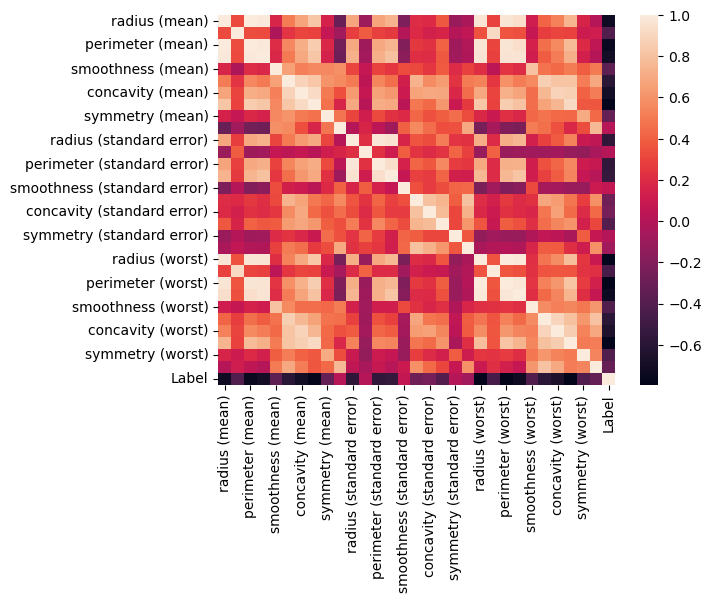

In [28]:
sns.heatmap(df.corr())

In [50]:
corr_attrib = df.corr().iloc[:,-1]


In [52]:
corr_attrib

radius (mean)                        -0.730029
texture (mean)                       -0.415185
perimeter (mean)                     -0.742636
area (mean)                          -0.708984
smoothness (mean)                    -0.358560
compactness (mean)                   -0.596534
concavity (mean)                     -0.696360
concave points (mean)                -0.776614
symmetry (mean)                      -0.330499
fractal dimension (mean)              0.012838
radius (standard error)              -0.567134
texture (standard error)              0.008303
perimeter (standard error)           -0.556141
area (standard error)                -0.548236
smoothness (standard error)           0.067016
compactness (standard error)         -0.292999
concavity (standard error)           -0.253730
concave points (standard error)      -0.408042
symmetry (standard error)             0.006522
fractal dimension (standard error)   -0.077972
radius (worst)                       -0.776454
texture (wors

In [53]:
not_corr_attrib= corr_attrib[corr_attrib.abs() < 0.1]

In [54]:
not_corr_attrib

fractal dimension (mean)              0.012838
texture (standard error)              0.008303
smoothness (standard error)           0.067016
symmetry (standard error)             0.006522
fractal dimension (standard error)   -0.077972
Name: Label, dtype: float64

In [55]:
corr_feature = corr_attrib[corr_attrib.abs()>=0.1]

In [71]:
corr_feature #we can this coorelated features to trained th model

radius (mean)                     -0.730029
texture (mean)                    -0.415185
perimeter (mean)                  -0.742636
area (mean)                       -0.708984
smoothness (mean)                 -0.358560
compactness (mean)                -0.596534
concavity (mean)                  -0.696360
concave points (mean)             -0.776614
symmetry (mean)                   -0.330499
radius (standard error)           -0.567134
perimeter (standard error)        -0.556141
area (standard error)             -0.548236
compactness (standard error)      -0.292999
concavity (standard error)        -0.253730
concave points (standard error)   -0.408042
radius (worst)                    -0.776454
texture (worst)                   -0.456903
perimeter (worst)                 -0.782914
area (worst)                      -0.733825
smoothness (worst)                -0.421465
compactness (worst)               -0.590998
concavity (worst)                 -0.659610
concave points (worst)          

In [57]:
len(corr_feature)

26

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))

In [60]:
X=scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,shuffle=True)

###  3. Model Training

In [62]:
model=LogisticRegression()

In [65]:
model.fit(X_train,y_train)

LogisticRegression()

### 4. Model Prediction

In [66]:
pred = model.predict(X_test)

In [67]:
print('Predicted Actual')
for p,a in zip(pred,y_test):
    print(f'{p:^9} {a:^6}')

Predicted Actual
    1       1   
    0       0   
    1       1   
    0       0   
    1       1   
    0       0   
    1       1   
    1       1   
    0       0   
    0       0   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       0   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    0       0   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    1       1   
    0       0   
    1       1   
    1       1   
    1       1   
    0       0   
    1       1   
    1       1   
    1       1   
    0       0   
    1       1   
    1       1   
    1       1   
    0       0   
    0       0   
    1       1   
    0       0   
    0       0   
    0       0   
    1       1   
    0       0   
    1       1   
    0       0   
    0       0   
    0       0   
    0       0 

In [68]:
total_true=sum(pred==y_test)
total=len(y_test)

In [69]:
accuracy = (total_true/total)*100

In [70]:
accuracy

98.24561403508771

### 5. Model Evaluation

In [74]:
cm = confusion_matrix(y_test,pred)

In [75]:
cm

array([[36,  2],
       [ 0, 76]], dtype=int64)

In [76]:
cr = classification_report(y_test,pred)

In [78]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        76

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

